**Project Description :** This project analyzes airline customer satisfaction data to predict churn risk using service feedback features. Includes detailed EDA, feature engineering, and machine learning models (Logistic Regression, Random Forest, XGBoost), along with insights to support targeted retention strategies.

**About Dataset :** This data given by an airline organization. The dataset consists of the details of customers who have already flown with them. The feedback of the customers on various context and their flight data has been consolidated.

**Problem Statement :** The main purpose of this dataset is to predict whether a future customer would be satisfied with their service given the details of the other parameters values. Also the airlines need to know on which aspect of the services offered by them have to be emphasized more to generate more satisfied customers.

**Column Description:**

**Gender:** Gender of the passengers (Female, Male)

**Customer Type:** The customer type (Loyal customer, disloyal customer)

**Age:** The actual age of the passengers

**Type of Travel:** Purpose of the flight of the passengers (Personal Travel, Business Travel)

**Class:** Travel class in the plane of the passengers (Business, Eco, Eco Plus)

**Flight distance:** The flight distance of this journey

**Inflight wifi service:** Satisfaction level of the inflight wifi service.

**Departure/Arrival time convenient:** Satisfaction level of Departure/Arrival time convenient

**Ease of Online booking:** Satisfaction level of online booking

**Gate location:** Satisfaction level of Gate location

**Food and drink:** Satisfaction level of Food and drink

**Online boarding:** Satisfaction level of online boarding

**Seat comfort:** Satisfaction level of Seat comfort

**Inflight entertainment:** Satisfaction level of inflight entertainment

**On-board service:** Satisfaction level of On-board service

**Leg room service:** Satisfaction level of Leg room service

**Baggage handling:** Satisfaction level of baggage handling

**Check-in service:** Satisfaction level of Check-in service

**Inflight service:** Satisfaction level of inflight service

**Cleanliness:** Satisfaction level of Cleanliness

**Departure Delay in Minutes:** Minutes delayed when departure

**Arrival Delay in Minutes:** Minutes delayed when Arrival

**Satisfaction:** Airline satisfaction level(satisfied, neutral or dissatisfied)

**Labelled satisfied :** 0 (Not at risk to churn), 1 neutral or dissatisfied : 1 (At risk to churn)

**Importing Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, ConfusionMatrixDisplay, roc_curve, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from scipy.stats import randint, uniform
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

**Loading of the Dataset**

In [ ]:
train_data = pd.read_csv("/content/drive/MyDrive/train.csv")
test_data = pd.read_csv("/content/drive/MyDrive/test.csv")
train_data

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


**Data Cleaning**

In [ ]:
## Merging training & testing dataset

df = pd.concat([train_data, test_data], ignore_index=True)
df

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,25971,78463,Male,disloyal Customer,34,Business travel,Business,526,3,3,...,4,3,2,4,4,5,4,0,0.0,neutral or dissatisfied
129876,25972,71167,Male,Loyal Customer,23,Business travel,Business,646,4,4,...,4,4,5,5,5,5,4,0,0.0,satisfied
129877,25973,37675,Female,Loyal Customer,17,Personal Travel,Eco,828,2,5,...,2,4,3,4,5,4,2,0,0.0,neutral or dissatisfied
129878,25974,90086,Male,Loyal Customer,14,Business travel,Business,1127,3,3,...,4,3,2,5,4,5,4,0,0.0,satisfied


In [ ]:
# checking any duplicates

print(df.duplicated().sum())
print(df.duplicated().T.sum())

0
0


In [ ]:
# Replacing Index Col with ID

df.set_index("id", inplace = True)
df

,Unnamed: 0,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
id,,,,,,,,,,,,,,,,,,,,,
70172,0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
5047,1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
110028,2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
24026,3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
119299,4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78463,25971,Male,disloyal Customer,34,Business travel,Business,526,3,3,3,...,4,3,2,4,4,5,4,0,0.0,neutral or dissatisfied
71167,25972,Male,Loyal Customer,23,Business travel,Business,646,4,4,4,...,4,4,5,5,5,5,4,0,0.0,satisfied
37675,25973,Female,Loyal Customer,17,Personal Travel,Eco,828,2,5,1,...,2,4,3,4,5,4,2,0,0.0,neutral or dissatisfied


In [ ]:
df = df.drop(['Unnamed: 0'], axis = 1)
df

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
id,,,,,,,,,,,,,,,,,,,,,
70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78463,Male,disloyal Customer,34,Business travel,Business,526,3,3,3,1,...,4,3,2,4,4,5,4,0,0.0,neutral or dissatisfied
71167,Male,Loyal Customer,23,Business travel,Business,646,4,4,4,4,...,4,4,5,5,5,5,4,0,0.0,satisfied
37675,Female,Loyal Customer,17,Personal Travel,Eco,828,2,5,1,5,...,2,4,3,4,5,4,2,0,0.0,neutral or dissatisfied


In [ ]:
print(df.isnull().sum())

Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
satisfaction                           0
dtype: int64


In [ ]:
df.describe()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000
mean,39.427957,1190.316392,2.728696,3.057599,2.756876,2.976925,3.204774,3.252633,3.441361,3.358077,3.383023,3.350878,3.632114,3.306267,3.642193,3.286326,14.713713,15.091129
std,15.119360,997.452477,1.329340,1.526741,1.401740,1.278520,1.329933,1.350719,1.319289,1.334049,1.287099,1.316252,1.180025,1.266185,1.176669,1.313682,38.071126,38.465650
min,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,844.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,51.000000,1744.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [ ]:
df['satisfaction'].unique()

array(['neutral or dissatisfied', 'satisfied'], dtype=object)

In [ ]:
## Encoding

df['satisfaction'] = df['satisfaction'].map({'neutral or dissatisfied' : 1, 'satisfied' : 0})

In [ ]:
num_cols = df.select_dtypes(include = ['int64','float64'])
skew_data = num_cols.skew()
skew_data

,0
Age,-0.003606
Flight Distance,1.108142
Inflight wifi service,0.040465
Departure/Arrival time convenient,-0.332469
Ease of Online booking,-0.018779
Gate location,-0.058265
Food and drink,-0.155063
Online boarding,-0.456911
Seat comfort,-0.485818
Inflight entertainment,-0.366385


In [ ]:
# Handling Missing Values by Median Imputation

median_delay = df['Arrival Delay in Minutes'].median()
df['Arrival Delay in Minutes'] = df['Arrival Delay in Minutes'].fillna(median_delay)

print(df.isnull().sum())

Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64


In [ ]:
df.describe()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000
mean,39.427957,1190.316392,2.728696,3.057599,2.756876,2.976925,3.204774,3.252633,3.441361,3.358077,3.383023,3.350878,3.632114,3.306267,3.642193,3.286326,14.713713,15.045465,0.565537
std,15.119360,997.452477,1.329340,1.526741,1.401740,1.278520,1.329933,1.350719,1.319289,1.334049,1.287099,1.316252,1.180025,1.266185,1.176669,1.313682,38.071126,38.416353,0.495688
min,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000,0.000000
50%,40.000000,844.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000,1.000000
75%,51.000000,1744.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000,1.000000
max,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000,1.000000


In [ ]:
## Skewness after Median Imputation

num_cols = df.select_dtypes(include = ['int64','float64'])
skew_data = num_cols.skew()
skew_data

,0
Age,-0.003606
Flight Distance,1.108142
Inflight wifi service,0.040465
Departure/Arrival time convenient,-0.332469
Ease of Online booking,-0.018779
Gate location,-0.058265
Food and drink,-0.155063
Online boarding,-0.456911
Seat comfort,-0.485818
Inflight entertainment,-0.366385


In [ ]:
## Checking Multi Collinearity in the dataset

# Only use numeric columns
X = df.select_dtypes(include='number').drop(columns = ['satisfaction'])  # Drop target variable if supervised learning
X = add_constant(X)

# Compute VIF for each feature
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)  # high multicollinearity in last 2 cols as the VIF > 5

                              feature        VIF
0                               const  38.191824
1                                 Age   1.096117
2                     Flight Distance   1.095389
3               Inflight wifi service   2.386349
4   Departure/Arrival time convenient   1.438513
5              Ease of Online booking   2.642198
6                       Gate location   1.487542
7                      Food and drink   2.169958
8                     Online boarding   1.877501
9                        Seat comfort   2.379253
10             Inflight entertainment   3.799868
11                   On-board service   1.759198
12                   Leg room service   1.302526
13                   Baggage handling   1.894806
14                    Checkin service   1.214841
15                   Inflight service   2.060897
16                        Cleanliness   2.849594
17         Departure Delay in Minutes  12.571645
18           Arrival Delay in Minutes  12.581029


**Exploratory Data Analysis**

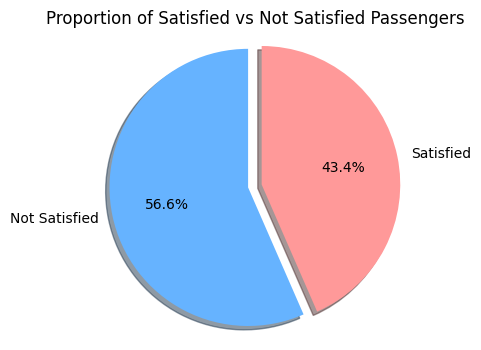

In [ ]:
# Pie chart displaying proportion of churned customers

# Count churned vs not churned
churn_counts = df['satisfaction'].value_counts()
labels = ['Not Satisfied', 'Satisfied']
colors = ['#66b3ff', '#ff9999']

# Plot pie chart
plt.figure(figsize=(4, 4))
plt.pie(
    churn_counts,
    labels=labels,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    explode=(0, 0.1), shadow = True
)
plt.title("Proportion of Satisfied vs Not Satisfied Passengers")
plt.axis('equal')  # Ensures the pie is circular
plt.show()

In [ ]:
## Multivariate Analysis : Checking relationship b/w different numeric cols

corr_matrix = df.corr(numeric_only= True)
corr_matrix

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
Age,1.000000,0.099459,0.016116,0.036960,0.022565,-0.000398,0.023194,0.207572,0.159136,0.074947,0.057078,0.039119,-0.047991,0.033475,-0.051347,0.052565,-0.009041,-0.011206,-0.134091
Flight Distance,0.099459,1.000000,0.006701,-0.018914,0.065165,0.005520,0.057066,0.214825,0.157662,0.130507,0.111194,0.134533,0.064855,0.073608,0.059316,0.095648,0.002402,-0.001973,-0.298085
Inflight wifi service,0.016116,0.006701,1.000000,0.344915,0.714807,0.338573,0.132214,0.457445,0.121513,0.207802,0.119928,0.160317,0.120376,0.043762,0.110029,0.131300,-0.015946,-0.017762,-0.283460
Departure/Arrival time convenient,0.036960,-0.018914,0.344915,1.000000,0.437620,0.447510,0.000687,0.072287,0.008666,-0.008380,0.067297,0.010617,0.070833,0.091132,0.072195,0.009862,0.000778,-0.001005,0.054270
Ease of Online booking,0.022565,0.065165,0.714807,0.437620,1.000000,0.460041,0.030514,0.404866,0.028561,0.046564,0.039064,0.109450,0.039148,0.008819,0.035373,0.015125,-0.005318,-0.007046,-0.168877
Gate location,-0.000398,0.005520,0.338573,0.447510,0.460041,1.000000,-0.002872,0.002756,0.002788,0.002741,-0.029019,-0.005181,0.000972,-0.039353,0.000310,-0.005918,0.005973,0.005643,0.002793
Food and drink,0.023194,0.057066,0.132214,0.000687,0.030514,-0.002872,1.000000,0.233500,0.575846,0.623461,0.057404,0.033173,0.035321,0.085198,0.035210,0.658054,-0.029164,-0.031685,-0.211340
Online boarding,0.207572,0.214825,0.457445,0.072287,0.404866,0.002756,0.233500,1.000000,0.419253,0.283922,0.154242,0.123225,0.083541,0.204238,0.074058,0.329377,-0.019404,-0.022663,-0.501749
Seat comfort,0.159136,0.157662,0.121513,0.008666,0.028561,0.002788,0.575846,0.419253,1.000000,0.611837,0.130545,0.104272,0.074620,0.189979,0.068842,0.679613,-0.027999,-0.030397,-0.348829
Inflight entertainment,0.074947,0.130507,0.207802,-0.008380,0.046564,0.002741,0.623461,0.283922,0.611837,1.000000,0.418574,0.300397,0.379123,0.119554,0.406094,0.692511,-0.027012,-0.030183,-0.398234


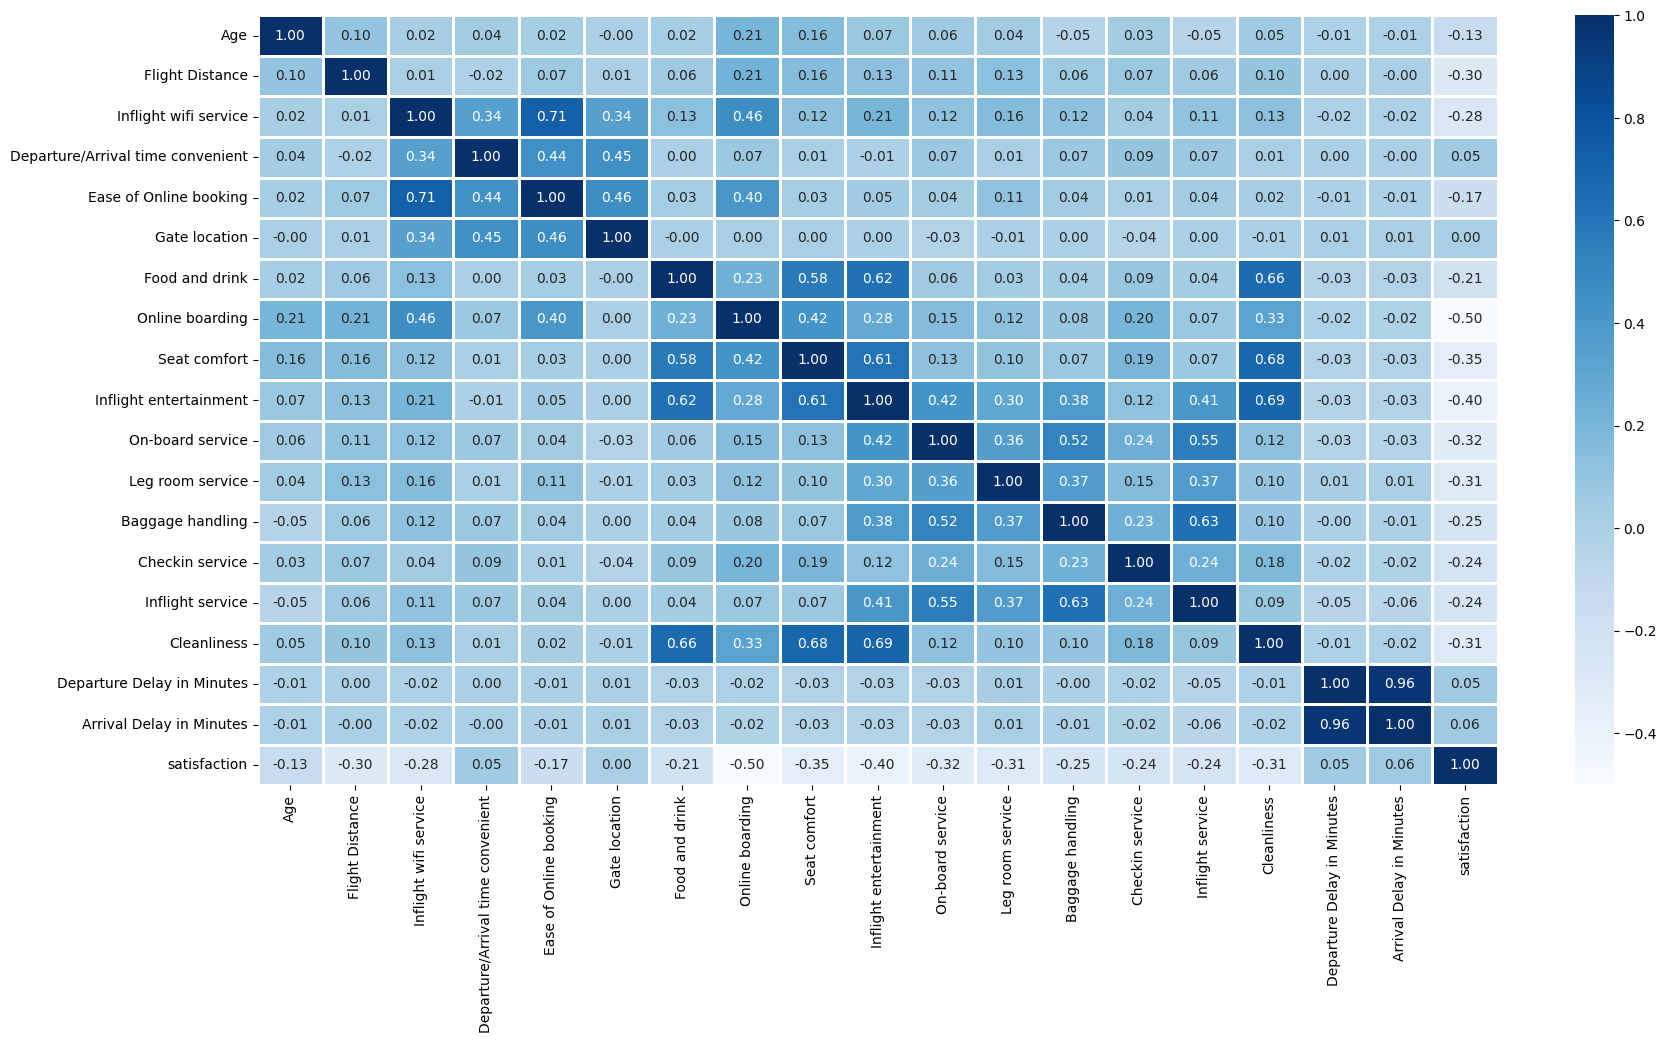

In [ ]:
## correlation heatmap

plt.figure(figsize = (20,10))
sns.heatmap(corr_matrix, annot = True, fmt = ".2f", linewidths= 2, cmap = "Blues")
plt.show()

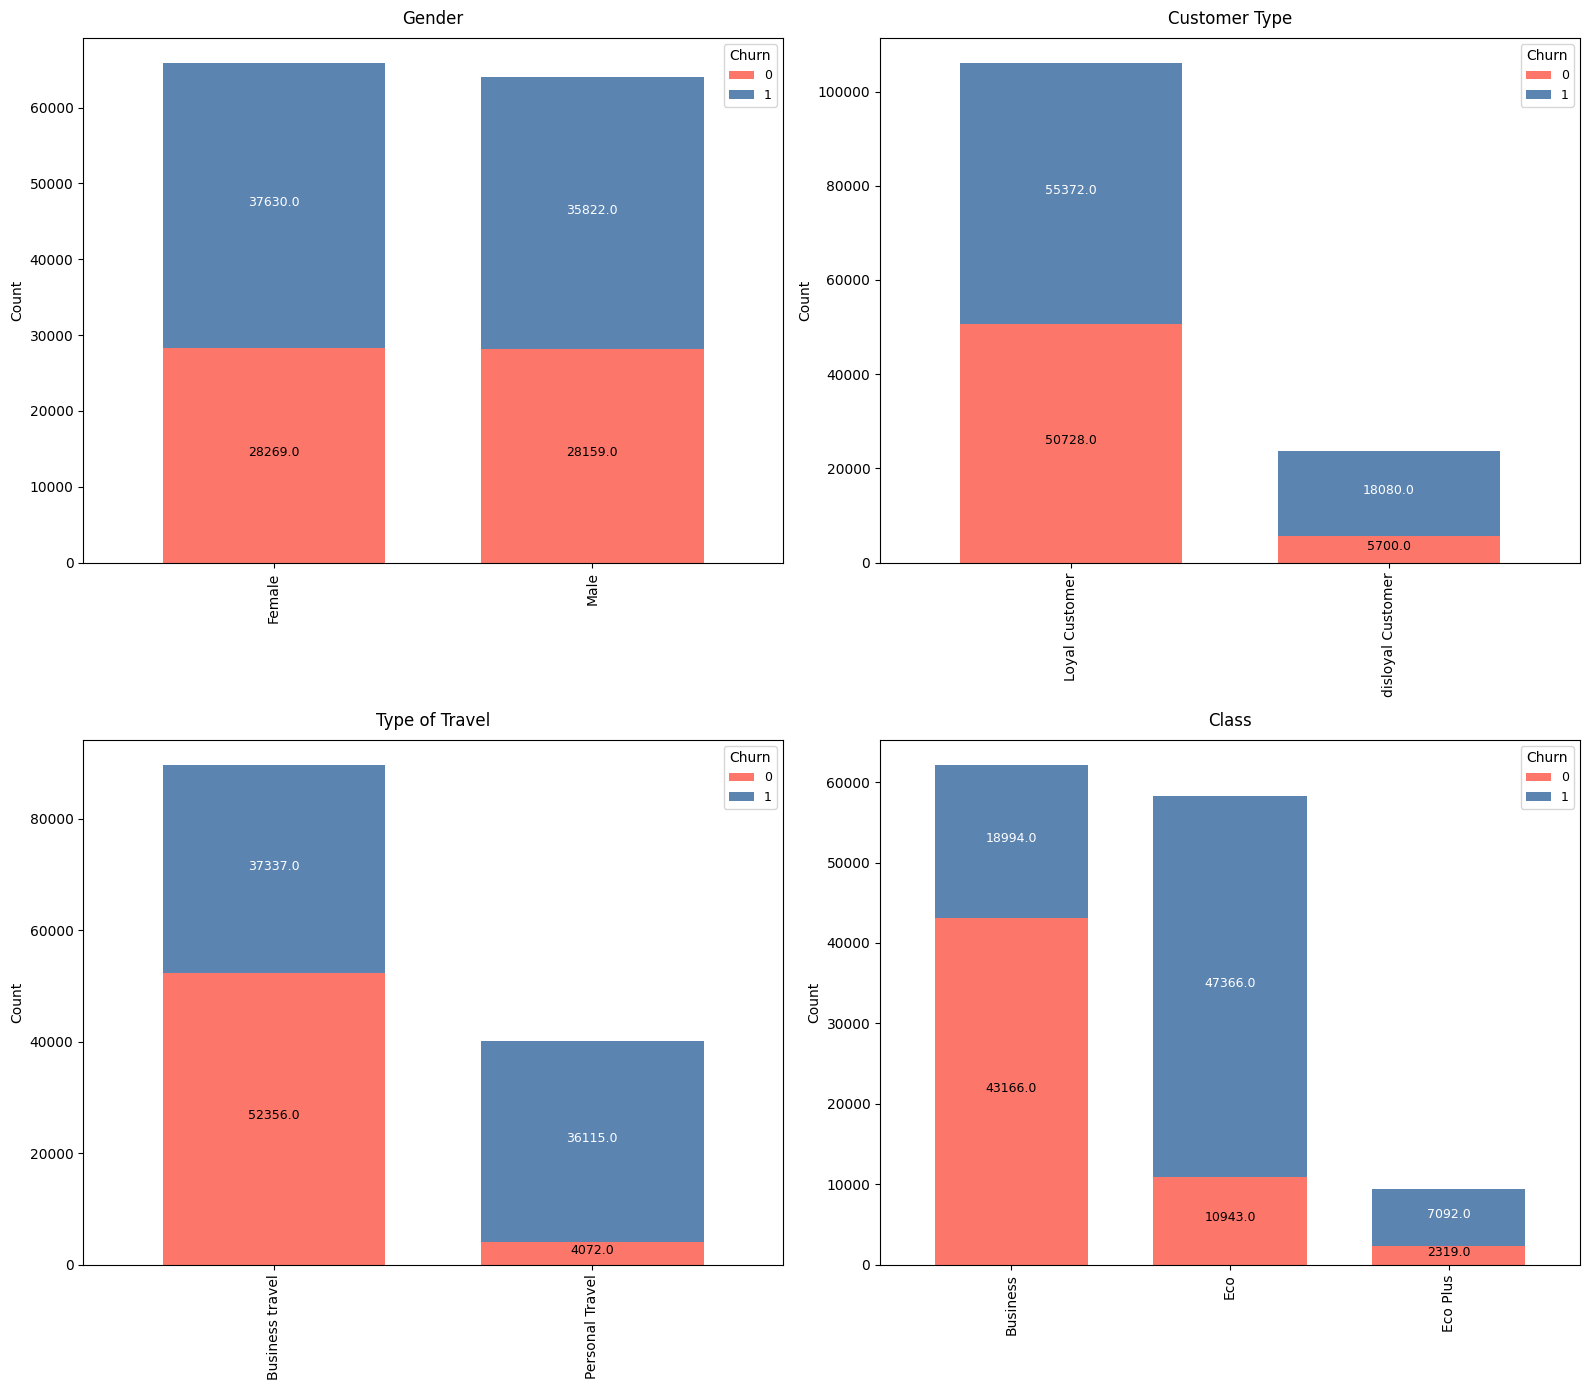

In [ ]:
## Bivariate Analysis

categorical_cols = ['Gender', 'Customer Type', 'Type of Travel', 'Class']

# Setting up the plot grid
fig, axes = plt.subplots(2, 2, figsize=(16, 14))
axes = axes.flatten()

colors = ['#FC766AFF', '#5B84B1FF']

for i, col in enumerate(categorical_cols):
    ax = axes[i]

    # To creat crosstab
    df_count = pd.crosstab(df[col], df['satisfaction'])

    # Plot stacked bar chart
    bars = df_count.plot(kind='bar', stacked=True, ax=ax, color=colors, width=0.7)
    ax.set_title(col, fontsize=12, pad=10)
    ax.set_ylabel("Count", fontsize=10)
    ax.set_xlabel("")

    # To add data labels
    for container in ax.containers:
        try:
            label = int(container.get_label())
        except ValueError:
            label = container.get_label()

        if label in df_count.columns:
            total = df_count.sum(axis=1)
            percent = df_count[label] / total * 100
            labels = [f'{v}' if v > 0 else '' for v in container.datavalues]
            ax.bar_label(container, labels=labels,
                         label_type='center',
                         color='white' if label == 1 else 'black',
                         fontsize=9,
                         padding=2)

    ax.legend(title="Churn", bbox_to_anchor=(1, 1),
              title_fontsize=10, fontsize=9)

plt.tight_layout()
plt.show()

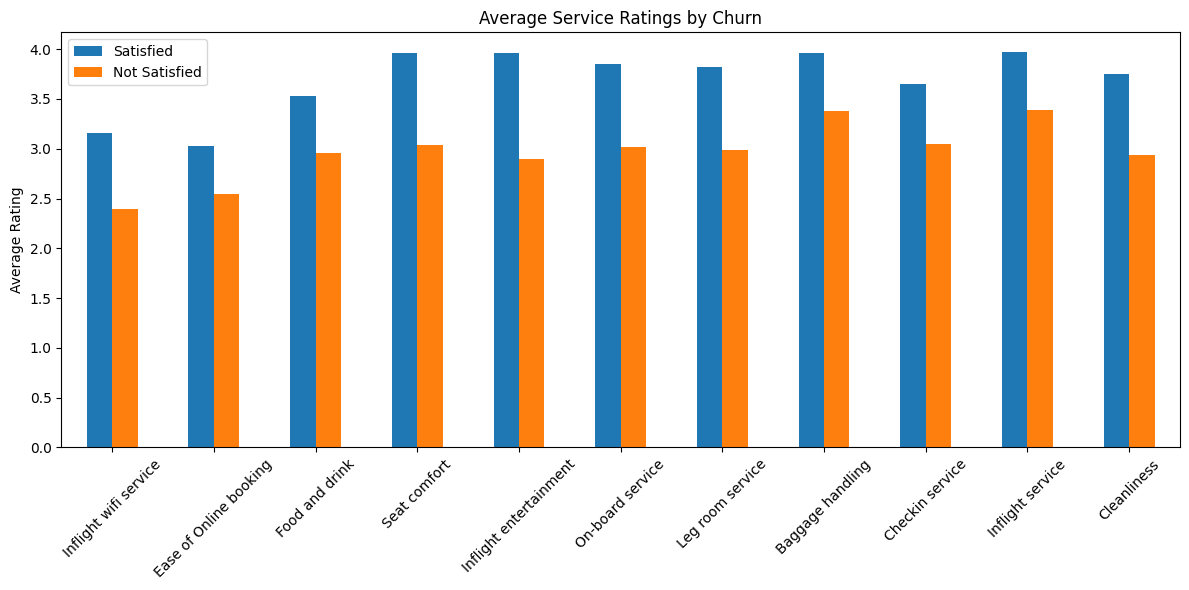

In [ ]:
service_cols = ['Inflight wifi service', 'Ease of Online booking', 'Food and drink', 'Seat comfort', 'Inflight entertainment',
                'On-board service', 'Leg room service', 'Baggage handling',
                'Checkin service', 'Inflight service', 'Cleanliness']

avg_service = df.groupby('satisfaction')[service_cols].mean().T
avg_service.columns = ['Satisfied', 'Not Satisfied']
avg_service.plot(kind='bar', figsize=(12, 6), title='Average Service Ratings by Churn')
plt.ylabel("Average Rating")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

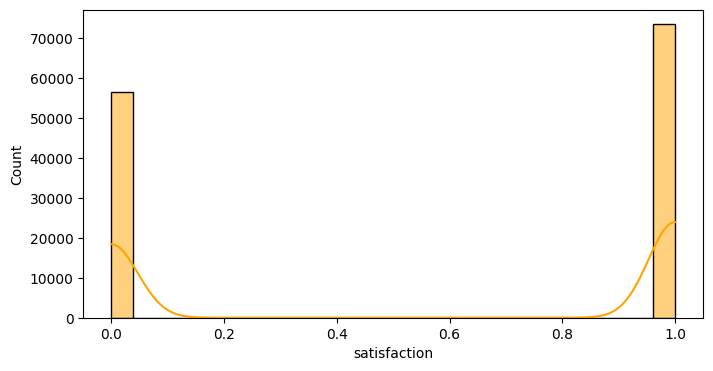

In [ ]:
## Target Variable Distribution : Satisfaction

plt.figure(figsize = (8,4))
sns.histplot(data = df, x = 'satisfaction' , kde = True, color = 'orange')
plt.show()

**Model Fitting**

**Independent Variables (Customer Service Experience Features):**

1. inflightWifi
2. departure/arrivalTime
3. easeOnlineBooking
4. gateLocation
5. food
6. onlineBoarding
7. seatComfort
8. entertainment
9. on-boardService
10. legRoomService
11. baggageHandling
12. checkinService
13. inflightService
14. cleanliness
15. Departure Delay in Minutes
16. Arrival Delay in Minutes

**Dependent Variable (satisfaction):**

1 → Likely to Churn (At Risk)

0 → Unlikely to Churn (Not at Risk)

In [ ]:
# service-related feature
service_features = ['Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location','Food and drink',
                    'Online boarding', 'Seat comfort', 'Inflight entertainment','On-board service', 'Leg room service', 'Baggage handling',
                    'Checkin service', 'Inflight service', 'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']

target = 'satisfaction'

In [ ]:
# train test split

# Define features and target
X = df[service_features]
y = df["satisfaction"]

# Perform train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
print(X_train.shape)
print(X_test.shape)

(103904, 16)
(25976, 16)


In [ ]:
## Applying Standard Scaling to the data

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**Logistic Regression CV**

In [ ]:
# Set common parameters
Cs = [0.01, 0.1, 1, 10, 100]
cv = 5
max_iter = 200
solver = 'liblinear'

# L1 model
lr_l1 = LogisticRegressionCV(Cs=Cs, cv=cv, penalty='l1', solver=solver,
                             scoring='f1', max_iter=max_iter, random_state=42)
lr_l1.fit(X_train_scaled, y_train)
f1_l1 = f1_score(y_test, lr_l1.predict(X_test_scaled))

# L2 model
lr_l2 = LogisticRegressionCV(Cs=Cs, cv=cv, penalty='l2', solver=solver,
                             scoring='f1', max_iter=max_iter, random_state=42)
lr_l2.fit(X_train_scaled, y_train)
f1_l2 = f1_score(y_test, lr_l2.predict(X_test_scaled))

# Choose the best model
if f1_l1 > f1_l2:
    best_model = lr_l1
    print("Best Penalty: l1")
else:
    best_model = lr_l2
    print("Best Penalty: l2")

print("Best C:", best_model.C_)

# Use it to predict
y_pred_lr = best_model.predict(X_test_scaled)

Best Penalty: l1
Best C: [0.01]


**Classification Report of Logistic Regression CV**

In [ ]:
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Classification Report:\n", classification_report(y_test, y_pred_lr))

Logistic Regression Accuracy: 0.8134816753926701
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.77      0.78     11354
           1       0.83      0.85      0.84     14622

    accuracy                           0.81     25976
   macro avg       0.81      0.81      0.81     25976
weighted avg       0.81      0.81      0.81     25976



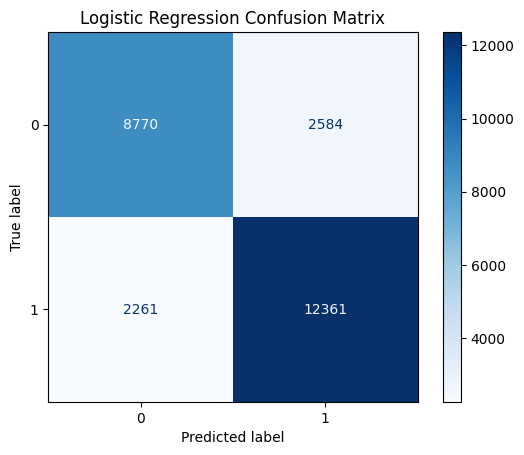

In [ ]:
## Confusion Matrix Display

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_lr, cmap='Blues')
plt.title("Logistic Regression Confusion Matrix")
plt.show()

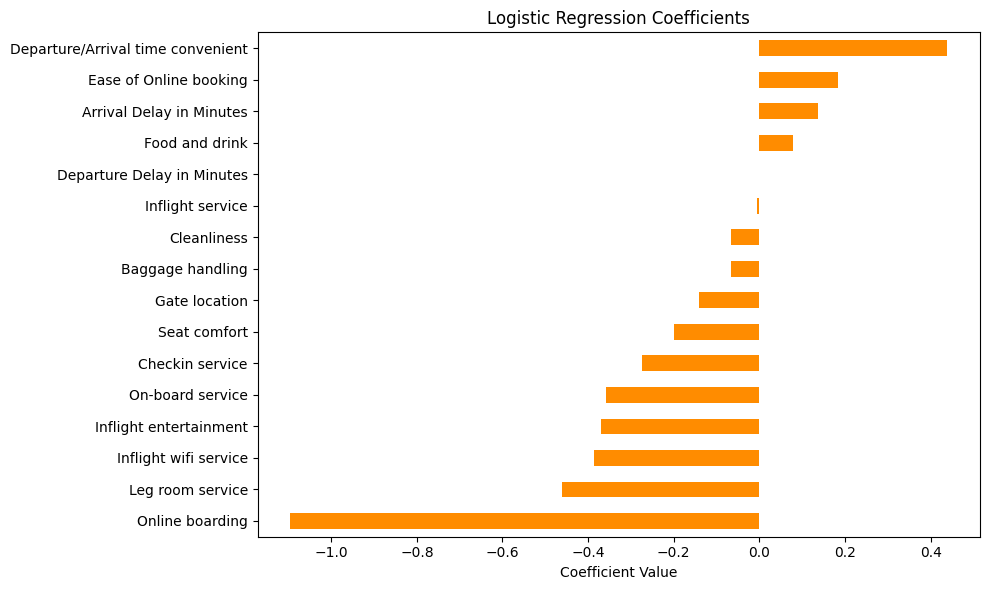

In [ ]:
# logistic regression coeffiecients

coefficients = pd.Series(best_model.coef_[0], index=service_features)
coefficients.sort_values().plot(kind='barh', figsize=(10, 6), color='darkorange')
plt.title("Logistic Regression Coefficients")
plt.xlabel("Coefficient Value")
plt.tight_layout()
plt.show()

In [ ]:
## Fitting the Logistic Regression Model on Training Dataset to check whether data is overfitting or underfitting or it's perfect.

# Set common parameters
Cs = [0.01, 0.1, 1, 10, 100]
cv = 5
max_iter = 200
solver = 'liblinear'

# L1 model
lr_l1 = LogisticRegressionCV(Cs=Cs, cv=cv, penalty='l1', solver=solver,
                             scoring='f1', max_iter=max_iter, random_state=42)
lr_l1.fit(X_train_scaled, y_train)
f1_l1 = f1_score(y_test, lr_l1.predict(X_test_scaled))

# L2 model
lr_l2 = LogisticRegressionCV(Cs=Cs, cv=cv, penalty='l2', solver=solver,
                             scoring='f1', max_iter=max_iter, random_state=42)
lr_l2.fit(X_train_scaled, y_train)
f1_l2 = f1_score(y_test, lr_l2.predict(X_test_scaled))

# Choose the best model
if f1_l1 > f1_l2:
    best_model = lr_l1
    print("Best Penalty: l1")
else:
    best_model = lr_l2
    print("Best Penalty: l2")

print("Best C:", best_model.C_)

# Use it to predict
y_pred_lr_train = best_model.predict(X_train_scaled)

Best Penalty: l1
Best C: [0.01]


In [ ]:
print("Logistic Regression Accuracy:", accuracy_score(y_train, y_pred_lr_train))
print("Classification Report:\n", classification_report(y_train, y_pred_lr_train))   ## It's perfect

Logistic Regression Accuracy: 0.8169079149984602
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.77      0.79     45074
           1       0.83      0.85      0.84     58830

    accuracy                           0.82    103904
   macro avg       0.81      0.81      0.81    103904
weighted avg       0.82      0.82      0.82    103904



**Random Forest using Randomized Search CV**

In [ ]:
# Parameter grid
param_dist = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}

# Initialize model
rf = RandomForestClassifier(random_state=42)

# RandomizedSearchCV with F1 score
rf_random = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter= 20,
    scoring='f1',  # Optimizing for F1 score
    cv= 3,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Fit
rf_random.fit(X_train, y_train)

# Best params and score
print("Best Parameters:", rf_random.best_params_)
print("Best CV F1 Score:", rf_random.best_score_)

best_rf = rf_random.best_estimator_

# Predictions
y_pred = best_rf.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best Parameters: {'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': None}
Best CV F1 Score: 0.9529902269866727
Accuracy: 0.9477209732060363
              precision    recall  f1-score   support

           0       0.96      0.92      0.94     11354
           1       0.94      0.97      0.95     14622

    accuracy                           0.95     25976
   macro avg       0.95      0.94      0.95     25976
weighted avg       0.95      0.95      0.95     25976



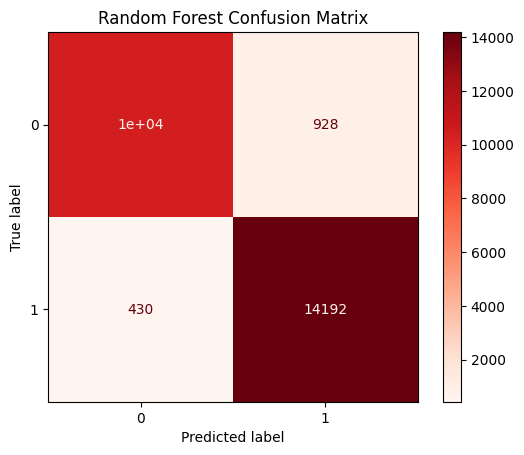

In [ ]:
## Confusion Matrix

ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='Reds')
plt.title("Random Forest Confusion Matrix")
plt.show()

In [ ]:
## Fitting the Random Forest Model on Training Dataset to check whether data is overfitting or underfitting or it's perfect.

# Parameter grid
param_dist = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}

# Initialize model
rf = RandomForestClassifier(random_state=42)

# RandomizedSearchCV with F1 score
rf_random = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter= 20,
    scoring='f1',  # Optimizing for F1 score
    cv= 3,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Fit
rf_random.fit(X_train, y_train)

# Best params and score
print("Best Parameters:", rf_random.best_params_)
print("Best CV F1 Score:", rf_random.best_score_)

best_rf = rf_random.best_estimator_

# Predictions
y_pred_rf_tr = best_rf.predict(X_train)

# Evaluation
print("Accuracy:", accuracy_score(y_train, y_pred_rf_tr))
print(classification_report(y_train, y_pred_rf_tr))

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best Parameters: {'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': None}
Best CV F1 Score: 0.9529902269866727
Accuracy: 0.990192870341854
              precision    recall  f1-score   support

           0       0.99      0.98      0.99     45074
           1       0.99      1.00      0.99     58830

    accuracy                           0.99    103904
   macro avg       0.99      0.99      0.99    103904
weighted avg       0.99      0.99      0.99    103904



**XGBoost using Randomized Search CV**

In [ ]:
# Define parameter grid for RandomizedSearchCV
param_dist = {
    'n_estimators': [100, 200, 300, 500, 800],
    'max_depth': [3, 4, 5, 6, 8, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3, 0.4],
    'min_child_weight': [1, 3, 5, 7]
}

# Initialize XGBClassifier
xgb = XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    use_label_encoder=False,
    random_state=42
)

# RandomizedSearchCV
xgb_random = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=20,                   # number of combinations to try
    scoring='f1',                 # since binary and balanced
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Fit the model
xgb_random.fit(X_train, y_train)

# Best parameters and CV score
print("Best Parameters:", xgb_random.best_params_)
print("Best CV F1 Score:", xgb_random.best_score_)

# Predictions
best_xgb = xgb_random.best_estimator_
y_pred_xgb = best_xgb.predict(X_test)


# Evaluation
print("Test Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))

Fitting 3 folds for each of 20 candidates, totalling 60 fits


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [11:30:57] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best Parameters: {'subsample': 0.9, 'n_estimators': 500, 'min_child_weight': 3, 'max_depth': 6, 'learning_rate': 0.1, 'gamma': 0.2, 'colsample_bytree': 1.0}
Best CV F1 Score: 0.9550146251215882
Test Accuracy: 0.9497998152140438
              precision    recall  f1-score   support

           0       0.96      0.93      0.94     11354
           1       0.94      0.97      0.96     14622

    accuracy                           0.95     25976
   macro avg       0.95      0.95      0.95     25976
weighted avg       0.95      0.95      0.95     25976



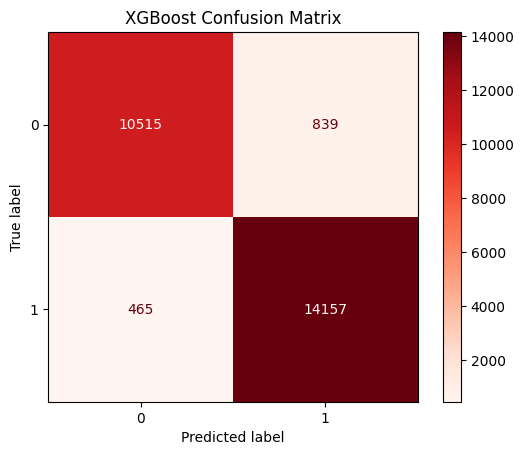

In [ ]:
## Confusion Matrix

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_xgb, cmap='Reds')
plt.title("XGBoost Confusion Matrix")
plt.show()

In [ ]:
## Fitting XGBoost Model on Training Dataset to check whether data is overfitting or underfitting or it's perfect.

# Define parameter grid for RandomizedSearchCV
param_dist = {
    'n_estimators': [100, 200, 300, 500, 800],
    'max_depth': [3, 4, 5, 6, 8, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3, 0.4],
    'min_child_weight': [1, 3, 5, 7]
}

# Initialize XGBClassifier
xgb = XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    use_label_encoder=False,
    random_state=42
)

# RandomizedSearchCV
xgb_random = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter= 20,                   # number of combinations to try
    scoring='f1',                 # since binary and balanced
    cv= 3,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Fit the model
xgb_random.fit(X_train, y_train)

# Best parameters and CV score
print("Best Parameters:", xgb_random.best_params_)
print("Best CV F1 Score:", xgb_random.best_score_)

# Predictions
best_xgb = xgb_random.best_estimator_
y_pred_xgb_tr = best_xgb.predict(X_train)


# Evaluation
print("Test Accuracy:", accuracy_score(y_train, y_pred_xgb_tr))
print(classification_report(y_train, y_pred_xgb_tr))

Fitting 3 folds for each of 20 candidates, totalling 60 fits


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [11:33:50] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best Parameters: {'subsample': 0.9, 'n_estimators': 500, 'min_child_weight': 3, 'max_depth': 6, 'learning_rate': 0.1, 'gamma': 0.2, 'colsample_bytree': 1.0}
Best CV F1 Score: 0.9550146251215882
Test Accuracy: 0.9664690483523253
              precision    recall  f1-score   support

           0       0.97      0.95      0.96     45074
           1       0.96      0.98      0.97     58830

    accuracy                           0.97    103904
   macro avg       0.97      0.96      0.97    103904
weighted avg       0.97      0.97      0.97    103904



**ROC - AUC Curve**

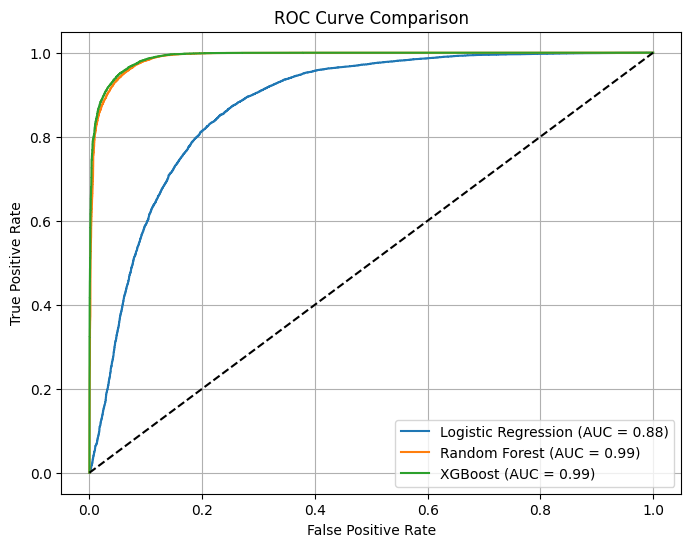

In [ ]:
# Get predicted probabilities for the positive class (Not Satisfied = 1)
y_prob_log = best_model.predict_proba(X_test_scaled)[:, 1]
y_prob_rf = best_rf.predict_proba(X_test)[:, 1]
y_prob_xgb = best_xgb.predict_proba(X_test)[:, 1]

# Compute ROC curves
fpr_log, tpr_log, _ = roc_curve(y_test, y_prob_log)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_prob_xgb)

# Compute AUC scores
auc_log = roc_auc_score(y_test, y_prob_log)
auc_rf = roc_auc_score(y_test, y_prob_rf)
auc_xgb = roc_auc_score(y_test, y_prob_xgb)

# Plot
plt.figure(figsize=(8, 6))
plt.plot(fpr_log, tpr_log, label=f"Logistic Regression (AUC = {auc_log:.2f})")
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {auc_rf:.2f})")
plt.plot(fpr_xgb, tpr_xgb, label=f"XGBoost (AUC = {auc_xgb:.2f})")

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

**Feature Importance using Random Forest**

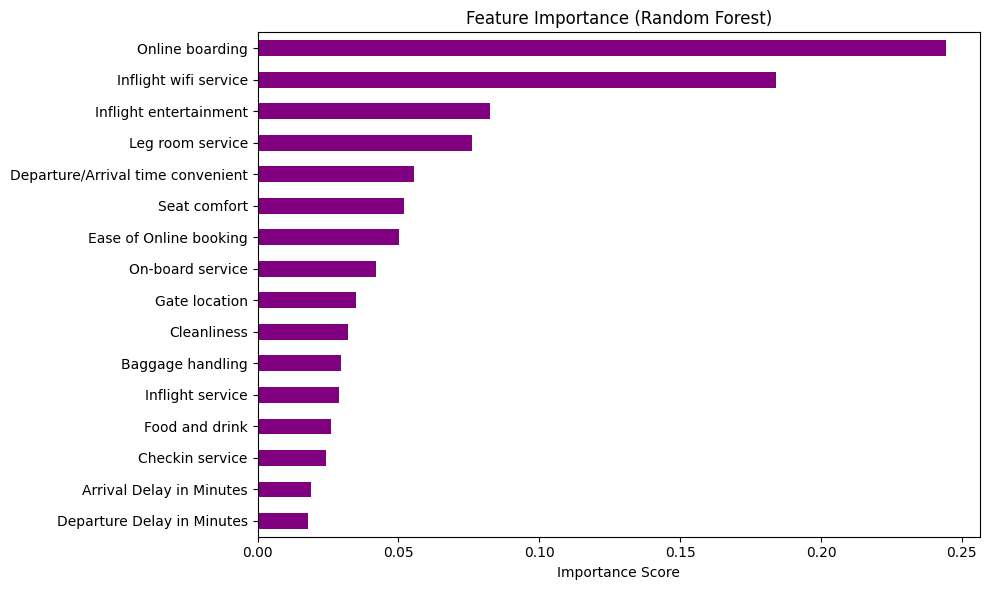

In [ ]:
# feature importance
importances = pd.Series(best_rf.feature_importances_, index = service_features)

# sort and plot
importances.sort_values(ascending=True).plot(kind='barh', figsize=(10, 6), color='purple')
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()